In [1]:
from platform import python_version
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import warnings
warnings.simplefilter("ignore")
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


## Trained on S5926 and predicted S350

In [2]:
df = pd.read_csv('S5296.csv')
df

,PDB Id,Mutated Chain,Mutation_PDB,Label,UniProt,Mutation_UNP,DDGexp,Location,DCS,DOMH,PSSM,P_L,P_RKDE,P_FWY,N_Hydro,N_Charg,SASA_pro,SASA_sol,PremPS,similar proteins
0,1A43,A,C218S,forward,P12497,C350S,3.70,COR,-7.158,-0.72,-1,0.069444,0.000000,0.069444,4,2,20,146.1,1.487019,1A43A
1,1A43,A,C218S,reverse,P12497,S350C,-3.70,COR,7.156,0.72,8,0.069444,0.000000,0.069444,3,2,12,129.8,-1.739746,1A43A
2,1A43,A,E159D,forward,P12497,E291D,4.55,SUR,-2.631,-0.09,2,0.069444,0.000000,0.069444,8,9,43,186.2,0.766227,1A43A
3,1A43,A,E159D,reverse,P12497,D291E,-4.55,SUR,2.630,0.09,4,0.069444,0.000000,0.069444,8,9,74,158.7,-0.723130,1A43A
4,1A43,A,G156A,forward,P12497,G288A,2.40,COR,-5.275,0.27,0,0.069444,0.000000,0.069444,6,8,17,88.1,1.187639,1A43A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,5PTI,A,Y35F,reverse,P00974,F70Y,-0.60,COR,3.864,-0.25,10,0.000000,0.017241,0.103448,7,5,10,222.8,-1.909816,8PTIA;1BPIA;1BTIA;1BPTA;5PTIA;1NAGA;1FANA
5292,5PTI,A,Y35G,forward,P00974,Y70G,5.00,COR,-9.586,-2.34,-9,0.000000,0.034483,0.103448,7,5,13,236.8,3.698962,8PTIA;1BPIA;1BTIA;1BPTA;5PTIA;1NAGA;1FANA
5293,5PTI,A,Y35G,reverse,P00974,G70Y,-5.00,COR,9.586,2.34,10,0.000000,0.000000,0.086207,6,5,5,88.1,-3.421731,8PTIA;1BPIA;1BTIA;1BPTA;5PTIA;1NAGA;1FANA
5294,5PTI,A,Y35N,forward,P00974,Y70N,3.70,COR,-8.558,-2.59,-8,0.000000,0.034483,0.103448,7,5,13,236.8,4.263901,8PTIA;1BPIA;1BTIA;1BPTA;5PTIA;1NAGA;1FANA


In [3]:
descriptive_features = df[["DDGexp", "DCS", "DOMH", "PSSM", "P_L", "P_RKDE", "P_FWY", "N_Hydro", "N_Charg",	"SASA_pro",	"SASA_sol"]]
descriptive_features

,DDGexp,DCS,DOMH,PSSM,P_L,P_RKDE,P_FWY,N_Hydro,N_Charg,SASA_pro,SASA_sol
0,3.70,-7.158,-0.72,-1,0.069444,0.000000,0.069444,4,2,20,146.1
1,-3.70,7.156,0.72,8,0.069444,0.000000,0.069444,3,2,12,129.8
2,4.55,-2.631,-0.09,2,0.069444,0.000000,0.069444,8,9,43,186.2
3,-4.55,2.630,0.09,4,0.069444,0.000000,0.069444,8,9,74,158.7
4,2.40,-5.275,0.27,0,0.069444,0.000000,0.069444,6,8,17,88.1
...,...,...,...,...,...,...,...,...,...,...,...
5291,-0.60,3.864,-0.25,10,0.000000,0.017241,0.103448,7,5,10,222.8
5292,5.00,-9.586,-2.34,-9,0.000000,0.034483,0.103448,7,5,13,236.8
5293,-5.00,9.586,2.34,10,0.000000,0.000000,0.086207,6,5,5,88.1
5294,3.70,-8.558,-2.59,-8,0.000000,0.034483,0.103448,7,5,13,236.8


In [4]:
target_feature = df[['PremPS']]
target_feature

,PremPS
0,1.487019
1,-1.739746
2,0.766227
3,-0.723130
4,1.187639
...,...
5291,-1.909816
5292,3.698962
5293,-3.421731
5294,4.263901


In [5]:
descriptive_features.isnull().sum()

DDGexp      0
DCS         0
DOMH        0
PSSM        0
P_L         0
P_RKDE      0
P_FWY       0
N_Hydro     0
N_Charg     0
SASA_pro    0
SASA_sol    0
dtype: int64

## Cross validation within S5296

In [ ]:
df_cv = pd.read_csv('S5296.csv')
print(df_cv.head(5))

  PDB Id Mutated Chain Mutation_PDB    Label UniProt Mutation_UNP  DDGexp  \
0   1A43             A        C218S  forward  P12497        C350S    3.70   
1   1A43             A        C218S  reverse  P12497        S350C   -3.70   
2   1A43             A        E159D  forward  P12497        E291D    4.55   
3   1A43             A        E159D  reverse  P12497        D291E   -4.55   
4   1A43             A        G156A  forward  P12497        G288A    2.40   

  Location    DCS  DOMH  PSSM       P_L  P_RKDE     P_FWY  N_Hydro  N_Charg  \
0      COR -7.158 -0.72    -1  0.069444     0.0  0.069444        4        2   
1      COR  7.156  0.72     8  0.069444     0.0  0.069444        3        2   
2      SUR -2.631 -0.09     2  0.069444     0.0  0.069444        8        9   
3      SUR  2.630  0.09     4  0.069444     0.0  0.069444        8        9   
4      COR -5.275  0.27     0  0.069444     0.0  0.069444        6        8   

   SASA_pro  SASA_sol    PremPS similar proteins  
0        20

In [ ]:
descriptive_features_cv = df_cv.iloc[:,1:-2]
descriptive_features_cv

,Mutated Chain,Mutation_PDB,Label,UniProt,Mutation_UNP,DDGexp,Location,DCS,DOMH,PSSM,P_L,P_RKDE,P_FWY,N_Hydro,N_Charg,SASA_pro,SASA_sol
0,A,C218S,forward,P12497,C350S,3.70,COR,-7.158,-0.72,-1,0.069444,0.000000,0.069444,4,2,20,146.1
1,A,C218S,reverse,P12497,S350C,-3.70,COR,7.156,0.72,8,0.069444,0.000000,0.069444,3,2,12,129.8
2,A,E159D,forward,P12497,E291D,4.55,SUR,-2.631,-0.09,2,0.069444,0.000000,0.069444,8,9,43,186.2
3,A,E159D,reverse,P12497,D291E,-4.55,SUR,2.630,0.09,4,0.069444,0.000000,0.069444,8,9,74,158.7
4,A,G156A,forward,P12497,G288A,2.40,COR,-5.275,0.27,0,0.069444,0.000000,0.069444,6,8,17,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,A,Y35F,reverse,P00974,F70Y,-0.60,COR,3.864,-0.25,10,0.000000,0.017241,0.103448,7,5,10,222.8
5292,A,Y35G,forward,P00974,Y70G,5.00,COR,-9.586,-2.34,-9,0.000000,0.034483,0.103448,7,5,13,236.8
5293,A,Y35G,reverse,P00974,G70Y,-5.00,COR,9.586,2.34,10,0.000000,0.000000,0.086207,6,5,5,88.1
5294,A,Y35N,forward,P00974,Y70N,3.70,COR,-8.558,-2.59,-8,0.000000,0.034483,0.103448,7,5,13,236.8


In [ ]:
descriptive_features_cv['Mutated Chain'] = pd.factorize(descriptive_features_cv['Mutated Chain'])[0]
descriptive_features_cv['Mutation_PDB'] = pd.factorize(descriptive_features_cv['Mutation_PDB'])[0]
descriptive_features_cv['Label'] = pd.factorize(descriptive_features_cv['Label'])[0]
descriptive_features_cv['UniProt'] = pd.factorize(descriptive_features_cv['UniProt'])[0]
descriptive_features_cv['Mutation_UNP'] = pd.factorize(descriptive_features_cv['Mutation_UNP'])[0]
descriptive_features_cv['Location'] = pd.factorize(descriptive_features_cv['Location'])[0]
descriptive_features_cv

,Mutated Chain,Mutation_PDB,Label,UniProt,Mutation_UNP,DDGexp,Location,DCS,DOMH,PSSM,P_L,P_RKDE,P_FWY,N_Hydro,N_Charg,SASA_pro,SASA_sol
0,0,0,0,0,0,3.70,0,-7.158,-0.72,-1,0.069444,0.000000,0.069444,4,2,20,146.1
1,0,0,1,0,1,-3.70,0,7.156,0.72,8,0.069444,0.000000,0.069444,3,2,12,129.8
2,0,1,0,0,2,4.55,1,-2.631,-0.09,2,0.069444,0.000000,0.069444,8,9,43,186.2
3,0,1,1,0,3,-4.55,1,2.630,0.09,4,0.069444,0.000000,0.069444,8,9,74,158.7
4,0,2,0,0,4,2.40,0,-5.275,0.27,0,0.069444,0.000000,0.069444,6,8,17,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,0,2440,1,128,4911,-0.60,0,3.864,-0.25,10,0.000000,0.017241,0.103448,7,5,10,222.8
5292,0,2441,0,128,4912,5.00,0,-9.586,-2.34,-9,0.000000,0.034483,0.103448,7,5,13,236.8
5293,0,2441,1,128,4913,-5.00,0,9.586,2.34,10,0.000000,0.000000,0.086207,6,5,5,88.1
5294,0,2442,0,128,4914,3.70,0,-8.558,-2.59,-8,0.000000,0.034483,0.103448,7,5,13,236.8


In [ ]:
target_feature_cv = df_cv[['PremPS']]
target_feature_cv

,PremPS
0,1.487019
1,-1.739746
2,0.766227
3,-0.723130
4,1.187639
...,...
5291,-1.909816
5292,3.698962
5293,-3.421731
5294,4.263901


In [ ]:
#To Check null values
descriptive_features_cv.isnull().sum()

Mutated Chain    0
Mutation_PDB     0
Label            0
UniProt          0
Mutation_UNP     0
DDGexp           0
Location         0
DCS              0
DOMH             0
PSSM             0
P_L              0
P_RKDE           0
P_FWY            0
N_Hydro          0
N_Charg          0
SASA_pro         0
SASA_sol         0
dtype: int64

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(descriptive_features_cv, target_feature_cv, test_size = 0.2,random_state = 42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4236, 17), (4236, 1), (1060, 17), (1060, 1))

### Random Forest

In [ ]:

regressor_RF_cv = RandomForestRegressor(n_estimators=500,criterion='squared_error', 
                                    max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, max_features=1.0)

regressor_RF_cv.fit(X_train,y_train) 
predicted_values_RF_cv = regressor_RF_cv.predict(X_test)
predicted_values_RF_cv

array([ 0.58608245, -1.30932908, -1.12266061, ...,  3.50158842,
        1.04848199, -0.92290195])

### SVM

In [ ]:
svc_cv = SVR(kernel="rbf", C=100)
svc_cv.fit(X_train,y_train) 
predicted_values_svr_cv = svc_cv.predict(X_test) 
predicted_values_svr_cv

array([ 0.39102055, -0.73703156,  1.05905019, ...,  1.31997598,
        1.22653524, -1.09143537])

### XG Boost GradientBoostingClassifier

In [ ]:
xgb_cv = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_cv.fit(X_train,y_train) 
predicted_values_xgb_cv = xgb_cv.predict(X_test)  
predicted_values_xgb_cv


array([ 0.5606251 , -1.15019501, -0.11202182, ...,  3.01930557,
        1.4051268 , -1.15942476])

In [ ]:
predicted_values_RF_cv.shape,predicted_values_svr_cv.shape,predicted_values_xgb_cv.shape

((1060,), (1060,), (1060,))

In [ ]:
y_test_evaluate = y_test

In [ ]:
y_test_evaluate['Predicted PremPS Random Forest'] = predicted_values_RF_cv
y_test_evaluate['Predicted PremPS SVM'] = predicted_values_svr_cv
y_test_evaluate['Predicted PremPS XG Boost']=predicted_values_xgb_cv

In [ ]:
y_test_evaluate

,PremPS,Predicted PremPS Random Forest,Predicted PremPS SVM,Predicted PremPS XG Boost
422,1.213587,0.586082,0.391021,0.560625
1101,-1.277986,-1.309329,-0.737032,-1.150195
810,-1.245039,-1.122661,1.059050,-0.112022
4262,3.028420,2.399270,1.114343,2.080819
5183,-0.551465,-0.632533,-0.174793,-0.982019
...,...,...,...,...
4573,-0.297443,-0.667424,-0.213209,-0.961628
2277,-1.199636,-1.160366,-1.097741,-1.278946
3226,3.446787,3.501588,1.319976,3.019306
602,1.304361,1.048482,1.226535,1.405127


In [ ]:
y_test_evaluate.shape

(1060, 4)

### Random Forrest Regressor

In [ ]:
import math
mse_cv_rf = mean_squared_error(y_test.PremPS, predicted_values_RF_cv)
rmse_cv_rf = math.sqrt(mse_cv_rf)
rmse_cv_rf

0.3544345134705846

### Support vector machine

In [ ]:
mse_cv_svr = mean_squared_error(y_test.PremPS, predicted_values_svr_cv)
rmse_cv_svr = math.sqrt(mse_cv_svr)
rmse_cv_svr

0.8763273827093322

### XG Boost

In [ ]:
mse_cv_xgb = mean_squared_error(y_test.PremPS, predicted_values_xgb_cv)
rmse_cv_xgb = math.sqrt(mse_cv_xgb)
rmse_cv_xgb

0.5146315951238956

In [ ]:
corr = y_test.corr(method='pearson', min_periods=1)
R_value_RF=corr.values[0][1]
R_value_svr = corr.values[0][2]
R_value_xgb = corr.values[0][3]


In [ ]:
R_value_RF,R_value_svr,R_value_xgb

(0.9655710393103284, 0.8068406415293246, 0.9252454999225845)

In [ ]:
corr

,PremPS,Predicted PremPS Random Forest,Predicted PremPS SVM,Predicted PremPS XG Boost
PremPS,1.000000,0.965571,0.806841,0.925245
Predicted PremPS Random Forest,0.965571,1.000000,0.823982,0.961183
Predicted PremPS SVM,0.806841,0.823982,1.000000,0.860124
Predicted PremPS XG Boost,0.925245,0.961183,0.860124,1.000000


### Correlation Matrix

<AxesSubplot:>

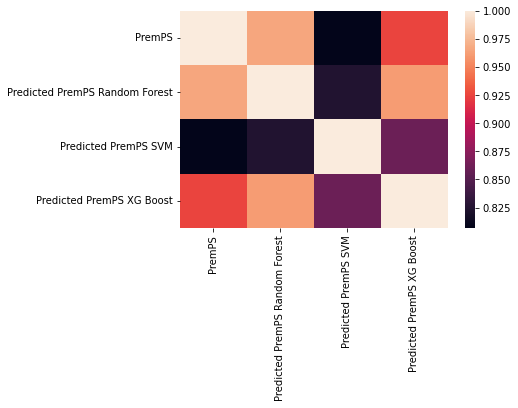

In [ ]:
import seaborn as sns
sns.heatmap(corr)